# Project: Who Suicides

Submitted by : K18-1301

# Importing Libraries

In [140]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

# Read Data
We use **"pandas.read_csv()"**  function to read the csv file. In the bracket, 
we put the file path along with a quotation mark, so that pandas will read the
file into a data frame from that address. The file path can be either a URL or
your local file address.

In [141]:
df=pd.read_csv("who_suicide_statistics.csv")

In [142]:
# show the first 5 rows using dataframe.head() method
df.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,NaN,277900.0
1,Albania,1985,female,25-34 years,NaN,246800.0
2,Albania,1985,female,35-54 years,NaN,267500.0
3,Albania,1985,female,5-14 years,NaN,298300.0
4,Albania,1985,female,55-74 years,NaN,138700.0


In [143]:
# show the last 5 rows using dataframe.head() method
df.tail()

,country,year,sex,age,suicides_no,population
43771,Zimbabwe,1990,male,25-34 years,150.0,NaN
43772,Zimbabwe,1990,male,35-54 years,132.0,NaN
43773,Zimbabwe,1990,male,5-14 years,6.0,NaN
43774,Zimbabwe,1990,male,55-74 years,74.0,NaN
43775,Zimbabwe,1990,male,75+ years,13.0,NaN


In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43776 entries, 0 to 43775
Data columns (total 6 columns):
country        43776 non-null object
year           43776 non-null int64
sex            43776 non-null object
age            43776 non-null object
suicides_no    41520 non-null float64
population     38316 non-null float64
dtypes: float64(2), int64(1), object(3)
memory usage: 2.0+ MB


# Cleaning Data

In [145]:
# having 'years' in the age group seems unnecessary, and '05-14' will sort better than '5-14'
df.loc[:, 'age'] = df['age'].str.replace(' years','')
df.loc[df['age'] == '5-14', 'age'] = '05-14'

# crude rate calculation
df['crude_rate_per_100k'] = df['suicides_no'] / (df['population'] / 100000)

# preview
pd.concat([df[:2], df[10000:10002],df[-2:]])


,country,year,sex,age,suicides_no,population,crude_rate_per_100k
0,Albania,1985,female,15-24,NaN,277900.0,NaN
1,Albania,1985,female,25-34,NaN,246800.0,NaN
10000,Croatia,2007,female,55-74,84.0,533554.0,15.743486
10001,Croatia,2007,female,75+,45.0,204595.0,21.994672
43774,Zimbabwe,1990,male,55-74,74.0,NaN,NaN
43775,Zimbabwe,1990,male,75+,13.0,NaN,NaN


# Statistical Summary 
get the quick statistics, we use the describe method. 
It returns the number of terms in the column as 
- count,
- average column value as mean, 
- column standard deviation as std, 
- the maximum minimum values, 
- as well as the boundary of each of the quartiles.

By default, the data frame. describe function skips rows and columns that do not contain numbers.

In [146]:
df.describe()

,year,suicides_no,population,crude_rate_per_100k
count,43776.000000,41520.000000,3.831600e+04,36060.000000
mean,1998.502467,193.315390,1.664091e+06,13.185094
std,10.338711,800.589926,3.647231e+06,19.902566
min,1979.000000,0.000000,2.590000e+02,0.000000
25%,1990.000000,1.000000,8.511275e+04,0.781784
50%,1999.000000,14.000000,3.806550e+05,5.975607
75%,2007.000000,91.000000,1.305698e+06,17.010064
max,2016.000000,22338.000000,4.380521e+07,300.751880


# Full Summary Statistics 
We see that for the object type columns, a different set of statistics is evaluated like, 
- unique, 

Unique is the number of distinct objects in the column. 

- top,

Top is most frequently occurring object.

- and frequency. 

 And freq is the number of times the top object appears in the column.
 
 Some values in the table are shown here as NaN, which stands for not a number. This is because that
 particular statistical metric cannot be calculated for that specific column data type.

In [147]:
df.describe(include='all')

,country,year,sex,age,suicides_no,population,crude_rate_per_100k
count,43776,43776.000000,43776,43776,41520.000000,3.831600e+04,36060.000000
unique,141,NaN,2,6,NaN,NaN,NaN
top,Israel,NaN,male,15-24,NaN,NaN,NaN
freq,456,NaN,21888,7296,NaN,NaN,NaN
mean,NaN,1998.502467,NaN,NaN,193.315390,1.664091e+06,13.185094
std,NaN,10.338711,NaN,NaN,800.589926,3.647231e+06,19.902566
min,NaN,1979.000000,NaN,NaN,0.000000,2.590000e+02,0.000000
25%,NaN,1990.000000,NaN,NaN,1.000000,8.511275e+04,0.781784
50%,NaN,1999.000000,NaN,NaN,14.000000,3.806550e+05,5.975607
75%,NaN,2007.000000,NaN,NaN,91.000000,1.305698e+06,17.010064


## Info
Another method you can use to check your dataset is:
~~~~
dataframe.info
~~~~
It provides a concise summary of your DataFrame.

Here we are able to see the information of our dataframe, with the top 30 rows and the bottom 30 rows.

In [148]:
df.info

<bound method DataFrame.info of                     country  year     sex    age  suicides_no  population  \
0                   Albania  1985  female  15-24          NaN    277900.0   
1                   Albania  1985  female  25-34          NaN    246800.0   
2                   Albania  1985  female  35-54          NaN    267500.0   
3                   Albania  1985  female  05-14          NaN    298300.0   
4                   Albania  1985  female  55-74          NaN    138700.0   
5                   Albania  1985  female    75+          NaN     34200.0   
6                   Albania  1985    male  15-24          NaN    301400.0   
7                   Albania  1985    male  25-34          NaN    264200.0   
8                   Albania  1985    male  35-54          NaN    296700.0   
9                   Albania  1985    male  05-14          NaN    325800.0   
10                  Albania  1985    male  55-74          NaN    132500.0   
11                  Albania  1985    male   

# Evaluating for Missing Data
The missing values are converted to Python's default. We use Python's built-in functions to identify these missing values. There are two methods to detect missing data:

- .isnull()


- .notnull()

The output is a boolean value indicating whether the dataframe is missing data.

In [149]:
missing_data = df.isnull()
missing_data.head(5)

,country,year,sex,age,suicides_no,population,crude_rate_per_100k
0,False,False,False,False,True,False,True
1,False,False,False,False,True,False,True
2,False,False,False,False,True,False,True
3,False,False,False,False,True,False,True
4,False,False,False,False,True,False,True


### Count missing values in each column
Using a for loop in Python, we can quickly figure out the number of missing values in each column. 
As mentioned above, "True" represents a missing value, "False"  means the value is present in the dataset. 
In the body of the for loop the method  ".value_couts()"  counts the number of "True" values. 

In [150]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")  

country
False    43776
Name: country, dtype: int64

year
False    43776
Name: year, dtype: int64

sex
False    43776
Name: sex, dtype: int64

age
False    43776
Name: age, dtype: int64

suicides_no
False    41520
True      2256
Name: suicides_no, dtype: int64

population
False    38316
True      5460
Name: population, dtype: int64

crude_rate_per_100k
False    36060
True      7716
Name: crude_rate_per_100k, dtype: int64



Based on the summary above, each column has 205 rows of data, with seven columns containing missing data:

1. "suicides_no":           2256 missing data
2. "population":            5460  missing data
3. "crude_rate_per_100k":   7716 missing data


# Deal with missing data
How to deal with missing data:

1. Drop data 
    a. drop the whole row
    b. drop the whole column
2. Replace data
    a. replace it by mean
    b. replace it by frequency
    c. replace it based on other functions

#### Calculate the mean value for the 'population' column:

In [151]:
mean_p=df['suicides_no'].astype('float').mean(axis=0)

#### Replace "NaN" by mean value :

In [152]:
df['population'].replace(np.nan, mean_p, inplace= True)

#### Calculate the mean value for the 'crude_rate_per_100k' column:

In [153]:
mean_c=df['crude_rate_per_100k'].astype('float').mean(axis=0)

#### Replace "NaN" by mean value :

In [154]:
df['crude_rate_per_100k'].replace(np.nan, mean_c, inplace= True)

#### Calculate the mean value for the 'suicides_no' column:

In [155]:
mean_s=df['suicides_no'].astype('float').mean(axis=0)

#### Replace "NaN" by mean value :

In [156]:
df['suicides_no'].replace(np.nan, mean_s, inplace= True)

In [157]:
df.head(10)

,country,year,sex,age,suicides_no,population,crude_rate_per_100k
0,Albania,1985,female,15-24,193.31539,277900.0,13.185094
1,Albania,1985,female,25-34,193.31539,246800.0,13.185094
2,Albania,1985,female,35-54,193.31539,267500.0,13.185094
3,Albania,1985,female,05-14,193.31539,298300.0,13.185094
4,Albania,1985,female,55-74,193.31539,138700.0,13.185094
5,Albania,1985,female,75+,193.31539,34200.0,13.185094
6,Albania,1985,male,15-24,193.31539,301400.0,13.185094
7,Albania,1985,male,25-34,193.31539,264200.0,13.185094
8,Albania,1985,male,35-54,193.31539,296700.0,13.185094
9,Albania,1985,male,05-14,193.31539,325800.0,13.185094


In [158]:
df.tail(10)

,country,year,sex,age,suicides_no,population,crude_rate_per_100k
43766,Zimbabwe,1990,female,35-54,45.0,193.31539,13.185094
43767,Zimbabwe,1990,female,05-14,6.0,193.31539,13.185094
43768,Zimbabwe,1990,female,55-74,20.0,193.31539,13.185094
43769,Zimbabwe,1990,female,75+,3.0,193.31539,13.185094
43770,Zimbabwe,1990,male,15-24,132.0,193.31539,13.185094
43771,Zimbabwe,1990,male,25-34,150.0,193.31539,13.185094
43772,Zimbabwe,1990,male,35-54,132.0,193.31539,13.185094
43773,Zimbabwe,1990,male,05-14,6.0,193.31539,13.185094
43774,Zimbabwe,1990,male,55-74,74.0,193.31539,13.185094
43775,Zimbabwe,1990,male,75+,13.0,193.31539,13.185094


#### Now, we obtain the dataset with no missing values.

# Correct data format
We are almost there!

The last step in data cleaning is checking and making sure that all data is in the correct format (int, float, text or other).
In Pandas, we use

.dtype() to check the data type
.astype() to change the data type

#### Let's list the data types for each column:

In [159]:
df.dtypes

country                 object
year                     int64
sex                     object
age                     object
suicides_no            float64
population             float64
crude_rate_per_100k    float64
dtype: object

As we can see above, all columns are of the correct data type except suicide_no. Numerical variables should have type 
'float' or 'int', and variables with strings such as categories should have type 'object'. 
suicide_no should be int type 

In [160]:
#convert suicides_no datatype into int rom object
df["suicides_no"] = df["suicides_no"].astype("int")
print("Done")

Done


In [161]:
df.dtypes

country                 object
year                     int64
sex                     object
age                     object
suicides_no              int32
population             float64
crude_rate_per_100k    float64
dtype: object

##### Now, we finally obtain the cleaned dataset with no missing values and all data in its proper format.

# Binning 

In [162]:
#df["age"]=df["age"].astype(object, copy=True)

In [163]:
#binwidth = (max(df["age"])-min(df["age"]))/4

In [164]:
#bins_ranges=[5,15,25,65,75]
#bins_ranges   

In [165]:
#bin_names = ['children', 'Youth', 'Adults','Seniors']

In [166]:
#df['Age_bin_custom_range'] = pd.cut(np.array(df['Age']), bins=bin_ranges)
#df['Age_bin_custom_label'] = pd.cut(np.array(df['Age']),labels=bin_names)

In [167]:
df.head()

,country,year,sex,age,suicides_no,population,crude_rate_per_100k
0,Albania,1985,female,15-24,193,277900.0,13.185094
1,Albania,1985,female,25-34,193,246800.0,13.185094
2,Albania,1985,female,35-54,193,267500.0,13.185094
3,Albania,1985,female,05-14,193,298300.0,13.185094
4,Albania,1985,female,55-74,193,138700.0,13.185094


## Indicator variable (or dummy variable)
We will use the panda's method 'get_dummies' to assign numerical values to different categories of sex type.

In [168]:
df.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'crude_rate_per_100k'],
      dtype='object')

In [169]:
dummy_variable_1 = pd.get_dummies(df["sex"])
dummy_variable_1.head()

,female,male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [170]:
dummy_variable_1.rename(columns={'sex':'male', 'sex':'female'}, inplace=True)
dummy_variable_1.head()

,female,male
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


#### save the new csv

In [171]:
df.to_csv('who_suicudes_clean_df.csv')

### Basic facts about suicide
Before looking at how things change over time, we shall observe a few basic facts about suicide:
Men are far more prone to commiting suicide than women, or at least this is what the data shows.
Young people, adolescents in particular, are NOT at the greatest risk. See the charts below. These are only examples, but this general pattern comes up time and again.
There are considerable differences between countries even after age standardization. Recall the WHO map above.
Some part of the observed differences between countries and demographic groups may be explained by underreporting, biases and other issues with acknowledgment and classification of suicides.

The charts below show crude suicide rates per 100k population in 2015.

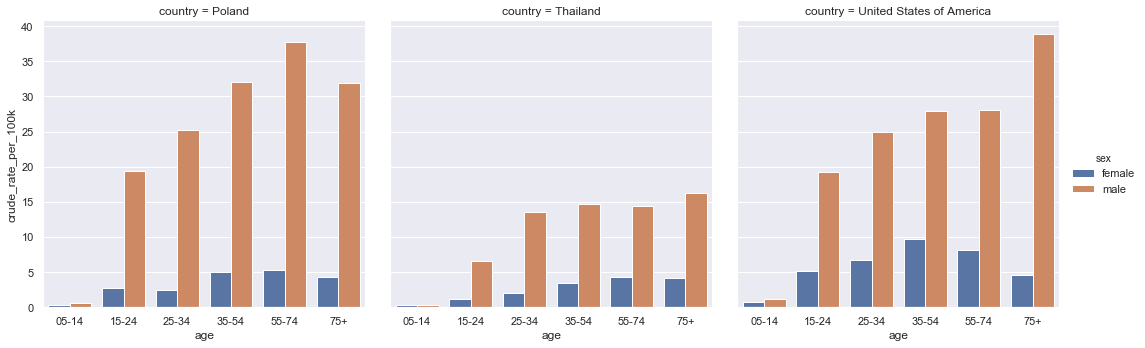

In [172]:
# seaborn settings reset
sns.set()

# chart data
cd = (df.loc[(df['country'].isin(['Poland','Thailand','United States of America'])) 
             &(df['year'] == 2015), ['country','sex','age','crude_rate_per_100k']]
      .sort_values(['sex','age']))

sns.catplot(x='age',hue='sex', col='country', y='crude_rate_per_100k'
            , data=cd, kind='bar', col_wrap=3)

In [174]:
# grouping into two decades of interest
df.loc[(df['year'] >= 1996) & (df['year'] <= 2005), 'decade'] = '1996-2005'
df.loc[(df['year'] >= 2006) & (df['year'] <= 2015), 'decade'] = '2006-2015'

# median of the crude rate in a decade, along with information about how many years of data are available
decade_df = (df.groupby(['country','decade','sex','age'])['crude_rate_per_100k'].agg(['median','count']).reset_index())
decade_df.head()

,country,decade,sex,age,median,count
0,Albania,1996-2005,female,05-14,0.278641,10
1,Albania,1996-2005,female,15-24,5.317182,10
2,Albania,1996-2005,female,25-34,3.682569,10
3,Albania,1996-2005,female,35-54,2.452446,10
4,Albania,1996-2005,female,55-74,1.779099,10


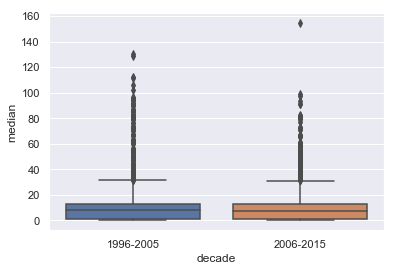

In [194]:
sns.boxplot(x='decade',y='median',data=decade_df)

 ##### we can calculate the correlation between variables of type "int64" or "float64" using the method "corr":

In [175]:
df.corr()

,year,suicides_no,population,crude_rate_per_100k
year,1.000000,-0.011351,0.020064,-0.062281
suicides_no,-0.011351,1.000000,0.606011,0.284933
population,0.020064,0.606011,1.000000,-0.003082
crude_rate_per_100k,-0.062281,0.284933,-0.003082,1.000000


In [176]:
# select only these cases where we have at least X years of data
valid_threshold = 5

In [177]:
# difference in median of crude rates between two decades
# perhaps there is a better way to calculate this, instead of doing two calculations and joining them into one table
d1_df = decade_df[(decade_df['decade'] == '1996-2005') & (decade_df['count'] >= valid_threshold)]
d2_df = decade_df[(decade_df['decade'] == '2006-2015') & (decade_df['count'] >= valid_threshold)]

final_df = d1_df.merge(d2_df, left_on=['country','sex','age'], right_on=['country','sex','age'], how='inner',suffixes=['_d1','_d2'])
           
final_df['crude_rate_diff'] = final_df['median_d2'] - final_df['median_d1']

# capping on crude rates difference
final_df.loc[final_df['crude_rate_diff'] > 20, 'crude_rate_diff'] = 20
final_df.loc[final_df['crude_rate_diff'] < -20, 'crude_rate_diff'] = -20

print('There are', final_df['country'].nunique(), 'countries with at least', valid_threshold, 'years of data.')
final_df.head()

There are 108 countries with at least 5 years of data.


,country,decade_d1,sex,age,median_d1,count_d1,decade_d2,median_d2,count_d2,crude_rate_diff
0,Albania,1996-2005,female,05-14,0.278641,10,2006-2015,7.039037,10,6.760396
1,Albania,1996-2005,female,15-24,5.317182,10,2006-2015,10.214777,10,4.897595
2,Albania,1996-2005,female,25-34,3.682569,10,2006-2015,9.056100,10,5.373531
3,Albania,1996-2005,female,35-54,2.452446,10,2006-2015,9.004743,10,6.552297
4,Albania,1996-2005,female,55-74,1.779099,10,2006-2015,8.627641,10,6.848542


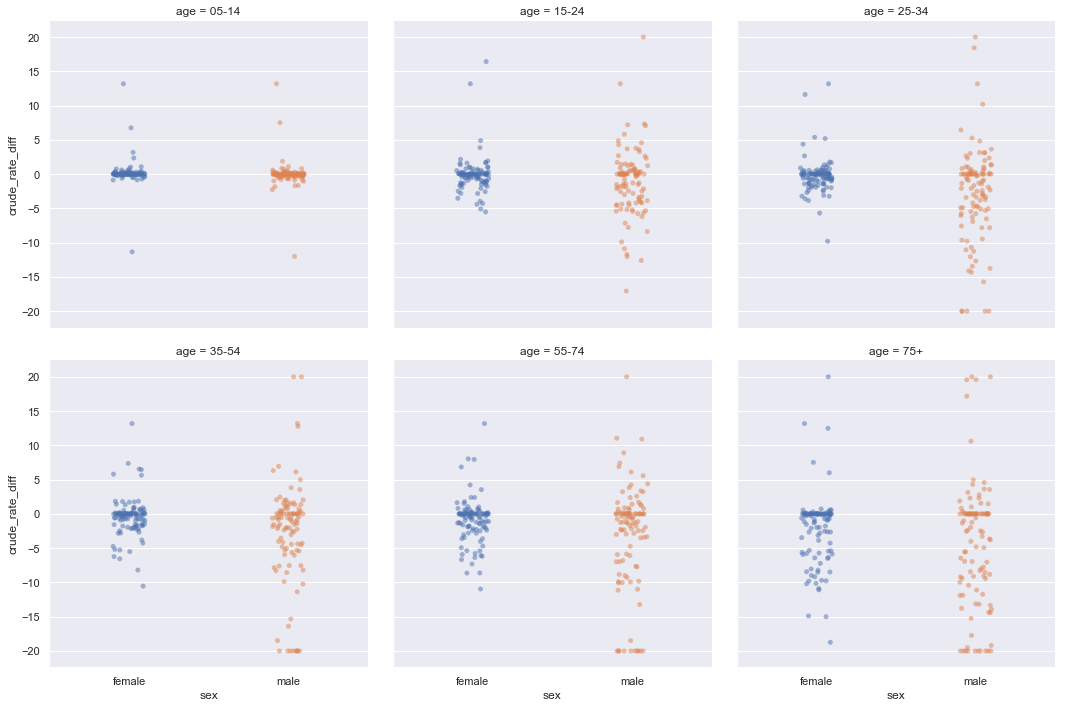

In [178]:
sns.catplot(x='sex', y="crude_rate_diff", col="age", col_wrap=3, sharey=True, data=final_df, alpha=0.5)

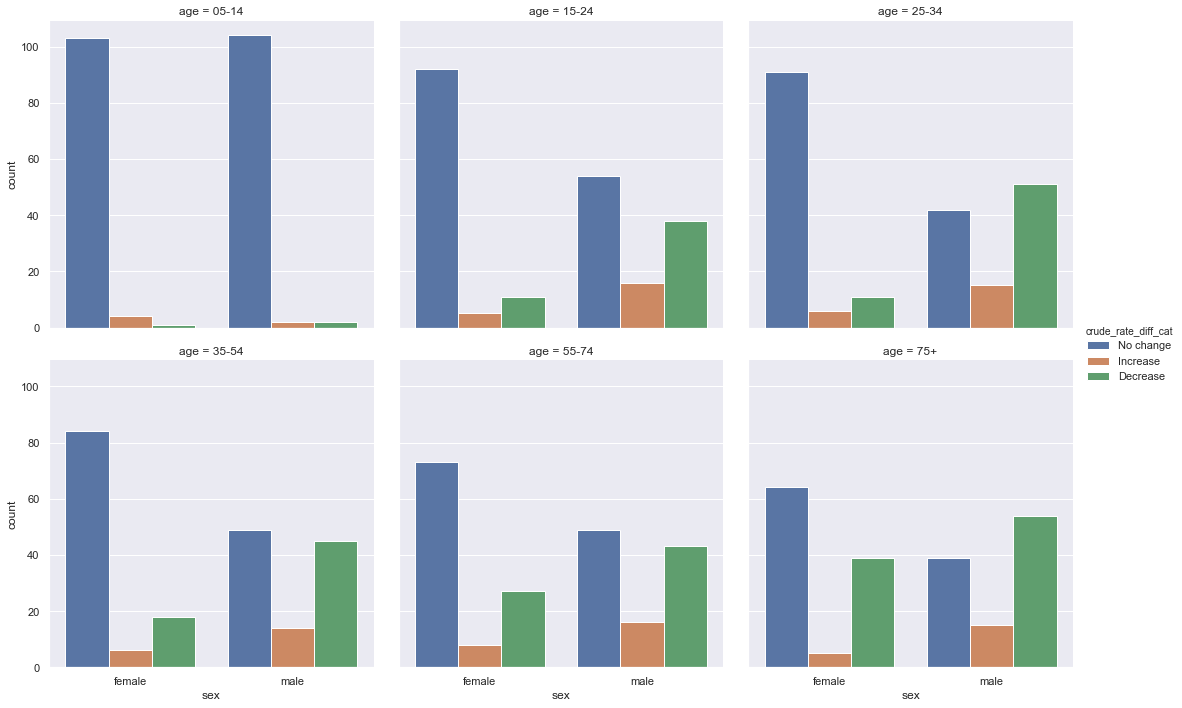

In [179]:
# decide what qualifies as change (increase or decrease)
def categorize_differences(x, threshold):
    if (x <= -threshold):
        diff_category = 'Decrease'
    elif (x >= threshold):
        diff_category = 'Increase'
    else:
        diff_category = 'No change'
    
    return diff_category
        
final_df['crude_rate_diff_cat'] = final_df['crude_rate_diff'].map(lambda x: categorize_differences(x, 2))

# results
sns.catplot(x='sex', hue='crude_rate_diff_cat', col='age', col_wrap=3, 
            data=final_df.sort_values(['age','crude_rate_diff_cat','sex'], ascending=[True,False,True]), 
            kind='count')

To quantify that notion, I put these results into three broad categories:

- Increase in suicide rates. The difference between the median suicide rates in 2006-2015 versus 1996-2005 is positive and    greater than (or equal to) a given threshold, which I set at 2 per 100k population.
- No change. The difference is smaller than the threshold, either way (negative or positive).
- Decrease in suicide rates.

# Pearson Correlation
The Pearson Correlation measures the linear dependence between two variables, X and Y. The resulting coefficient is a value between -1 and 1 inclusive, where:

- 1: total positive linear correlation,
- 0: no linear correlation, the two variables most likely do not affect each other
- -1: total negative linear correlation.
Pearson Correlation is the default method of the function "corr". As before, we can calculate the Pearson correlation of the of the 'int64' or 'float64' variables:

In [180]:
df.corr()

,year,suicides_no,population,crude_rate_per_100k
year,1.000000,-0.011351,0.020064,-0.062281
suicides_no,-0.011351,1.000000,0.606011,0.284933
population,0.020064,0.606011,1.000000,-0.003082
crude_rate_per_100k,-0.062281,0.284933,-0.003082,1.000000


###### P-value
What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.

By convention, when the p-value is:

- < 0.001 we say there is strong evidence that the correlation is significant,
- < 0.05; there is moderate evidence that the correlation is significant,
- < 0.1; there is weak evidence that the correlation is significant, 
- and is > 0.1; there is no evidence that the correlation is significant.


We can obtain this information using "stats" module in the "scipy" library:

In [181]:
from scipy import stats

In [188]:
pearson_coef, p_value = stats.pearsonr(final_df['median_d1'], final_df['median_d2'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)

The Pearson Correlation Coefficient is 0.9229281144251927  with a P-value of P = 0.0


#### Conclusion:
Since the p-value is < 0.001,  we say there is strong evidence that the correlation is significant,
although pearson correlation cofficient is 0.9~ 1 therefore total positive linear correlation